In [58]:
import pandas as pd
from google.colab import drive
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
import matplotlib.patches as mpatches

drive.mount('/content/drive/')
folder_path = '/content/drive/MyDrive/QBR'
qb_files = os.listdir(folder_path + '/QBs')
qb_files.sort(reverse=True)
qb_list = {}

def getDict(files):
  for i, folder in enumerate(qb_files):
    df = pd.read_csv(folder_path + '/QBs/' + folder)
    for row in df.iterrows():
      row = row[1]
      name = row['Player']
      for j, char in enumerate(name):
        if char != ' ' and char != '.' and not char.isalpha():
          end_ind = j
          break
        if j == len(name) - 1:
          end_ind = len(name)
      name = name[:end_ind]
      if row['Pos'] == 'QB':
        if name not in qb_list.keys():
          qb_list[name] = [float(row['Rate'])]
        else:
          qb_list[name].append(float(row['Rate']))
  for key in qb_list.keys():
    qb_list[key] = [sum(qb_list[key])/len(qb_list[key])]
  return qb_list
qb_list = getDict(qb_files)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [52]:
draft_files = os.listdir(folder_path + '/Draft Combine Data')
draft_files.sort()
full_draft_data = pd.read_csv(folder_path + '/Draft Combine Data/' + draft_files[-1], usecols=['Player','Pos','Forty','Vertical','BenchReps','BroadJump','Cone','Shuttle'])

for folder in draft_files[:-1]:
  df = pd.read_csv(folder_path + '/Draft Combine Data/' + folder, usecols=['Player','Pos','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle'])
  df.columns.values[:] = ['Player','Pos','Forty','Vertical','BenchReps','BroadJump','Cone','Shuttle']
  full_draft_data = pd.concat([full_draft_data, df], axis=0)

               Player  Pos  Forty  Vertical  BenchReps  BroadJump  Cone  \
0        John Abraham  OLB   4.55       NaN        NaN        NaN   NaN   
1     Shaun Alexander   RB   4.58       NaN        NaN        NaN   NaN   
2      Darnell Alford   OT   5.56      25.0       23.0       94.0  8.48   
3        Kyle Allamon   TE   4.97      29.0        NaN      104.0  7.29   
4    Rashard Anderson   CB   4.55      34.0        NaN      123.0  7.18   
..                ...  ...    ...       ...        ...        ...   ...   
459      Brock Wright   TE   4.62      31.5       26.0      118.0  7.27   
460    Nahshon Wright   DB   4.46      31.0        6.0      126.0  7.24   
461      Kenny Yeboah   TE    NaN      34.0        NaN      116.0   NaN   
462     Devonte Young   DB   4.70      32.0        NaN      118.0  7.41   
463      Landon Young   OT   5.00      30.5       34.0      108.0  7.70   

     Shuttle  
0        NaN  
1        NaN  
2       4.98  
3       4.49  
4       4.15  
..       

In [59]:
for row in full_draft_data.iterrows():
  row = row[1]
  if row['Player'] in qb_list.keys():
    draft_stats = [row['Forty'],row['Vertical'],row['BenchReps'],row['BroadJump'],row['Cone'],row['Shuttle']]
    qb_list[row['Player']].append(draft_stats)

{'Tom Brady': [97.5, [5.28, 24.5, nan, 99.0, 7.2, 4.38]], 'Justin Herbert': [98.0, [4.68, 35.5, nan, 123.0, 7.06, 4.46]], 'Matthew Stafford': [98.775, [4.81, 30.5, nan, 107.0, 7.06, 4.47]], 'Patrick Mahomes': [106.45, [4.8, 30.0, nan, 114.0, 6.88, 4.08]], 'Derek Carr': [97.525, [4.69, 34.5, nan, 110.0, nan, 4.2]], 'Joe Burrow': [99.05, [nan, nan, nan, nan, nan, nan]], 'Dak Prescott': [100.26666666666667, [4.79, 32.5, nan, 116.0, 7.11, 4.32]], 'Josh Allen': [88.15, [4.75, 33.5, nan, 119.0, 6.9, 4.4], [4.63, nan, 28.0, 118.0, 7.15, 4.23]], 'Kirk Cousins': [103.8, [4.84, 28.5, nan, 109.0, 7.05, 4.5]], 'Aaron Rodgers': [106.6, [4.71, 34.5, nan, 110.0, 7.38, nan]], 'Matt Ryan': [95.975, [4.89, nan, nan, nan, 7.4, 4.51]], 'Jimmy Garoppolo': [100.35, [4.97, 30.5, nan, 110.0, 7.04, 4.26]], 'Mac Jones': [92.5, [4.72, 32.0, nan, 116.0, 7.04, 4.39]], 'Kyler Murray': [94.09999999999998, [nan, nan, nan, nan, nan, nan]], 'Ryan Tannehill': [101.575, [4.65, nan, nan, nan, nan, nan]], 'Trevor Lawrence'

6


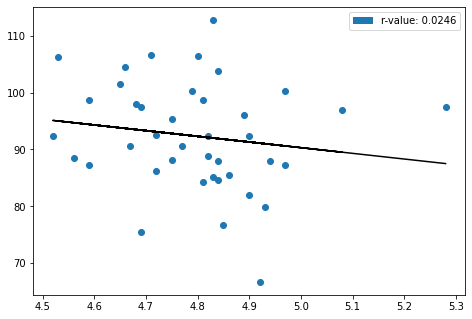

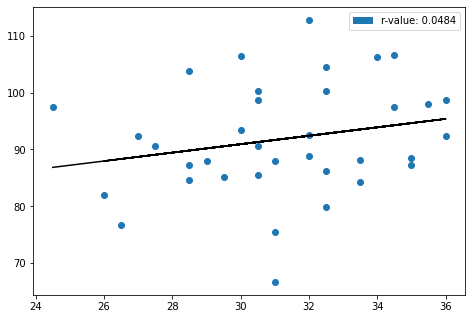

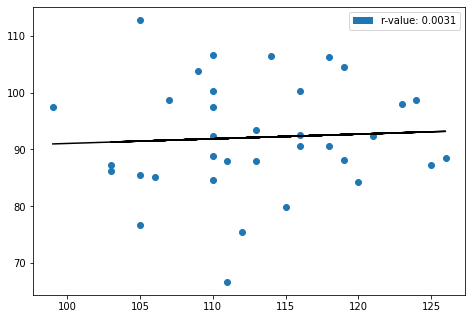

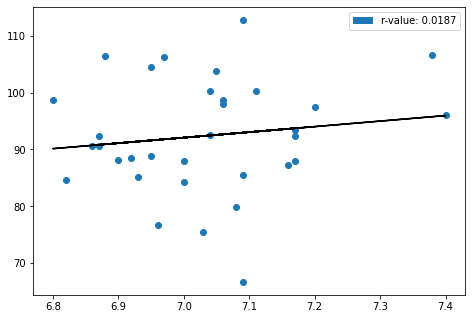

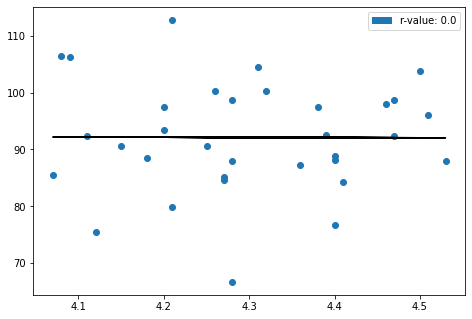

In [127]:
for i in range(len(full_draft_data.columns[2:])):
  if i != 2:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    cum_x=[]
    cum_y=[]
    for key in qb_list.keys():
      player_stats = qb_list[key]
      if len(player_stats) == 1:
        player_stats.append([np.nan,np.nan,np.nan,np.nan,np.nan,np.nan])
      if math.isnan(player_stats[1][i]) == False:
        cum_x.append(player_stats[1][i])
        cum_y.append(player_stats[0])
    slope, intercept, r_value, p_value, std_err = stats.linregress(cum_x,cum_y)
    r_value = mpatches.Patch(label = 'r-value: '+ str(np.round(r_value*r_value, decimals=4)))
    predicted_y = []
    for i, x_value in enumerate(cum_x):
      predict_y = intercept + slope * x_value
      predicted_y.append(predict_y)
    ax.scatter(cum_x,cum_y)
    ax.plot(cum_x, predicted_y, 'k-')
    plt.legend(handles=[r_value])
    plt.show()

# Vertical at NFL Draft Combine is best predictor of QBR